In [1]:
#import necessary modules
from pyhdf import SD
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
filename1='MOD21.A2016001.1515.006.2017215165634.hdf'
hdf=SD.SD(filename1)
hdf.datasets()

{'Emis_29': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  21,
  4),
 'Emis_29_err': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  23,
  8),
 'Emis_31': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  21,
  5),
 'Emis_31_err': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  23,
  9),
 'Emis_32': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  21,
  6),
 'Emis_32_err': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  23,
  10),
 'Emis_ASTER': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  21,
  12),
 'LST': (('swath_lines_1km:MOD_Swath_LST', 'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  23,
  2),
 'LST_err': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
 

In [3]:
pwvds=hdf.select('PWV')

In [4]:
pwvds.attributes()

{'_FillValue': 0,
 '_Offset': 0.0,
 '_Scale': 0.001,
 'coordsys': 'cartesian',
 'format': 'scaled',
 'long_name': 'Water vapor',
 'units': 'cm',
 'valid_range': [0.0, 65535.0]}

In [5]:
units=pwvds.attributes(full=1)['units'][0]

In [6]:
pwv=pwvds[:]*pwvds.attributes()['_Scale']

In [7]:
pwv

array([[ 3.408,  3.405,  3.401, ...,  2.989,  2.991,  2.991],
       [ 3.42 ,  3.417,  3.413, ...,  2.991,  2.993,  2.994],
       [ 3.432,  3.429,  3.425, ...,  2.993,  2.995,  2.996],
       ..., 
       [ 5.788,  5.796,  5.803, ...,  5.994,  5.995,  5.996],
       [ 5.783,  5.791,  5.798, ...,  5.997,  5.999,  6.   ],
       [ 5.778,  5.786,  5.793, ...,  6.001,  6.002,  6.004]])

In [8]:
pwv.min()

1.087

In [9]:
latitude=hdf.select('Latitude')[:]

In [10]:
longitude=hdf.select('Longitude')[:]

In [11]:
from scipy import interpolate

In [129]:
pwv.shape

(2030, 1354)

In [134]:
pwv[:6,:6]

array([[ 3.408,  3.405,  3.401,  3.398,  3.394,  3.391],
       [ 3.42 ,  3.417,  3.413,  3.41 ,  3.406,  3.403],
       [ 3.432,  3.429,  3.425,  3.422,  3.418,  3.415],
       [ 3.444,  3.44 ,  3.437,  3.434,  3.43 ,  3.427],
       [ 3.456,  3.452,  3.449,  3.446,  3.442,  3.439],
       [ 3.468,  3.464,  3.461,  3.456,  3.452,  3.447]])

In [133]:
longitude[:2,:2]

array([[-79.50370026, -79.28507996],
       [-79.51185608, -79.29322815]], dtype=float32)

In [31]:
z=pwv[::5,::5]

In [61]:
z

array([[ 3.408,  3.391,  3.368, ...,  2.955,  2.97 ,  2.987],
       [ 3.468,  3.447,  3.413, ...,  2.977,  2.985,  2.996],
       [ 3.467,  3.448,  3.414, ...,  2.977,  2.985,  2.996],
       ..., 
       [ 5.824,  5.859,  5.895, ...,  5.948,  5.961,  5.969],
       [ 5.823,  5.858,  5.893, ...,  5.948,  5.961,  5.969],
       [ 5.798,  5.836,  5.873, ...,  5.959,  5.974,  5.986]])

In [135]:
import geotiepoints as gp

In [140]:
longitude.shape

(406, 271)

In [141]:
lon1km,lat1km=gp.modis5kmto1km(longitude,latitude)

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/geotiepoints/geointerpolator.py:104: RuntimeWarning: invalid value encountered in arcsin
  / EARTH_RADIUS))))


In [143]:
lon1km.shape

(2030, 1354)

In [62]:
nlev=10
levels = np.linspace(0,10,11)

In [63]:
levels

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [71]:
colors=plt.cm.Blues(levels/10)

In [72]:
cmap = mpl.colors.ListedColormap(colors)

In [73]:
cmap.N

11

In [74]:
bounds = np.arange(nlev)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [75]:
Z = np.zeros(z.shape, dtype=np.float64)
for j in np.arange(len(levels)-1):
    Z[np.logical_and(z >= levels[j], z < levels[j+1])] = j  
Z[z >= levels[-1]] = len(levels)

In [76]:
Z

array([[ 3.,  3.,  3., ...,  2.,  2.,  2.],
       [ 3.,  3.,  3., ...,  2.,  2.,  2.],
       [ 3.,  3.,  3., ...,  2.,  2.,  2.],
       ..., 
       [ 5.,  5.,  5., ...,  5.,  5.,  5.],
       [ 5.,  5.,  5., ...,  5.,  5.,  5.],
       [ 5.,  5.,  5., ...,  5.,  5.,  5.]])

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


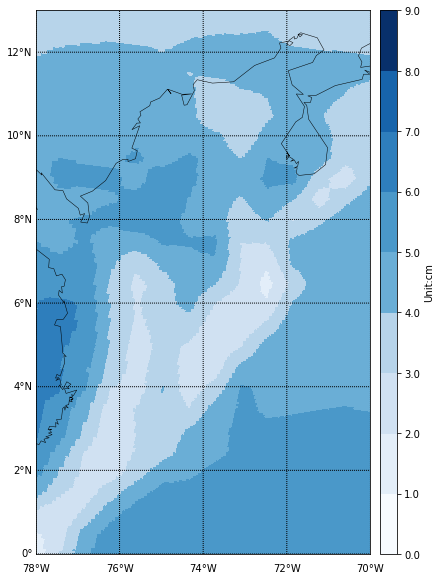

In [81]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=0, urcrnrlat = 13,
            llcrnrlon=-78, urcrnrlon = -70)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 2.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 2.), labels=[0, 0, 0, 1])
m.pcolormesh(longitude, latitude, Z, latlon=True, cmap=cmap, norm=norm)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

color_bar.set_ticks(range(nlev))
color_bar.set_ticklabels(levels)
color_bar.set_label('Unit:'+units)


/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


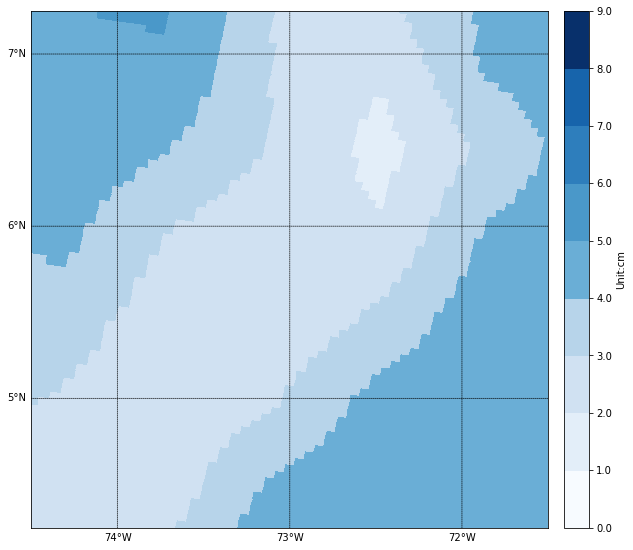

In [87]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=4.25, urcrnrlat = 7.25,
            llcrnrlon=-74.5, urcrnrlon = -71.5)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 1.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 1.), labels=[0, 0, 0, 1])
m.pcolormesh(longitude, latitude, Z, latlon=True, cmap=cmap, norm=norm)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

color_bar.set_ticks(range(nlev))
color_bar.set_ticklabels(levels)
color_bar.set_label('Unit:'+units)

In [118]:
x=longitude[:4,:4]
y=latitude[:4,:4]
mint=x

In [119]:
f = interpolate.interp2d(x,y,mint,kind='cubic')

In [120]:
x

array([[-79.50370026, -79.28507996, -79.07454681, -78.87153625],
       [-79.51185608, -79.29322815, -79.08270264, -78.87967682],
       [-79.51960754, -79.30105591, -79.09060669, -78.88764954],
       [-79.52777863, -79.30923462, -79.09876251, -78.89581299]], dtype=float32)

In [128]:
y

array([[ 17.55360413,  17.53266335,  17.51226616,  17.49238396],
       [ 17.46392632,  17.44434357,  17.4252491 ,  17.40661621],
       [ 17.46570778,  17.44470787,  17.42425728,  17.40431976],
       [ 17.37602615,  17.35638428,  17.3372345 ,  17.3185482 ]], dtype=float32)

In [121]:
x[0,1]

-79.28508

In [126]:
Xnew = np.linspace(x[0,0],x[0,1],6)
Ynew = np.linspace(y[0,0],y[1,0],6)


In [127]:
f(Xnew,Ynew)

array([[-79.50370026, -79.4599762 , -79.41625214, -79.37252808,
        -79.32880402, -79.28507996],
       [-79.50370026, -79.4599762 , -79.41625214, -79.37252808,
        -79.32880402, -79.28507996],
       [-79.50370026, -79.4599762 , -79.41625214, -79.37252808,
        -79.32880402, -79.28507996],
       [-79.50370026, -79.4599762 , -79.41625214, -79.37252808,
        -79.32880402, -79.28507996],
       [-79.50370026, -79.4599762 , -79.41625214, -79.37252808,
        -79.32880402, -79.28507996],
       [-79.50370026, -79.4599762 , -79.41625214, -79.37252808,
        -79.32880402, -79.28507996]])

In [144]:
Z = np.zeros(pwv.shape, dtype=np.float64)
for j in np.arange(len(levels)-1):
    Z[np.logical_and(pwv >= levels[j], pwv < levels[j+1])] = j  
Z[pwv >= levels[-1]] = len(levels)

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


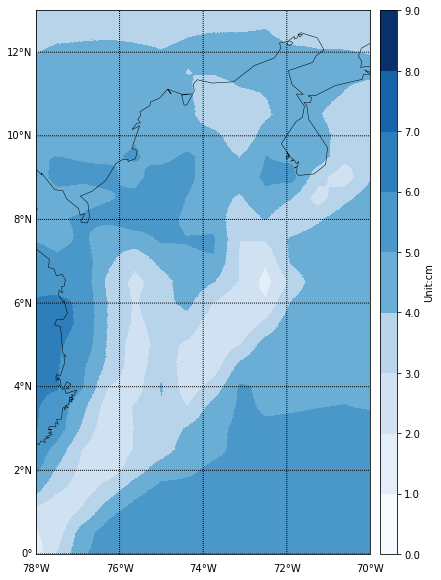

In [145]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=0, urcrnrlat = 13,
            llcrnrlon=-78, urcrnrlon = -70)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 2.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 2.), labels=[0, 0, 0, 1])
m.pcolormesh(lon1km, lat1km, Z, latlon=True, cmap=cmap, norm=norm)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

color_bar.set_ticks(range(nlev))
color_bar.set_ticklabels(levels)
color_bar.set_label('Unit:'+units)

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


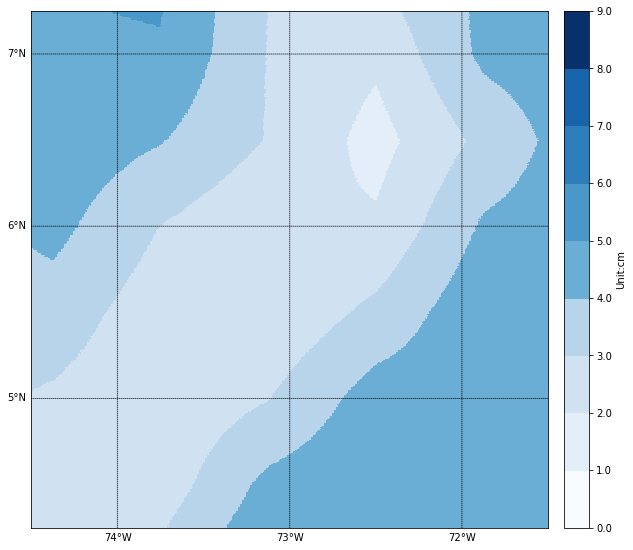

In [146]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=4.25, urcrnrlat = 7.25,
            llcrnrlon=-74.5, urcrnrlon = -71.5)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 1.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 1.), labels=[0, 0, 0, 1])
m.pcolormesh(lon1km, lat1km, Z, latlon=True, cmap=cmap, norm=norm)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

color_bar.set_ticks(range(nlev))
color_bar.set_ticklabels(levels)
color_bar.set_label('Unit:'+units)